<a href="https://colab.research.google.com/github/metaute73/Proyecto-Gen-mica-2024-2/blob/main/Procesamiento_Gen%C3%B3mica_15_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# 15 -21 files


In [5]:

def process_genomic_data(csv_file):
    """
    Carga un archivo CSV, filtra los datos, elimina valores atípicos usando MAD en 'Depth' y genera visualizaciones.

    Parámetros:
        csv_file (str): Ruta del archivo CSV.

    Retorna:
        pd.DataFrame: DataFrame procesado.
    """
    # Configurar estilo de gráficos
    plt.style.use('ggplot')
    sns.set_style("whitegrid")

    # Cargar datos
    df = pd.read_csv(csv_file, delimiter="\t")

    # Filtrar por longitud mínima
    df = df[df['Length'] >= 1000]

    # Eliminar valores atípicos en 'Depth' usando el método MAD
    median_depth = df['Depth'].median()
    MAD = np.median(np.abs(df['Depth'] - median_depth))
    threshold_mad = 3 * MAD
    lower_bound_mad = median_depth - threshold_mad
    upper_bound_mad = median_depth + threshold_mad
    df = df[(df['Depth'] >= lower_bound_mad) & (df['Depth'] <= upper_bound_mad)]

    # Graficar distribuciones
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    sns.histplot(df["Length"], bins=20, kde=True, color="seagreen", ax=axes[0, 0])
    axes[0, 0].set_title("Distribución de la Longitud de los Scaffolds")

    sns.histplot(df["GC"], bins=20, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title("Distribución del contenido GC")

    sns.histplot(df["Depth"], bins=20, kde=True, color="orange", ax=axes[1, 0])
    axes[1, 0].set_title("Distribución de la Profundidad de los Scaffolds")

    sns.histplot(df["AltAllels"], bins=10, kde=True, color="cyan", ax=axes[1, 1])
    axes[1, 1].set_title("Distribución de los Alelos Alternativos")

    plt.tight_layout()
    plt.show()

    # Ajustar el número de grupos para evitar desajustes con la paleta
    num_groups = min(len(df), 5)  # Máximo 6 grupos, pero limitado al tamaño de df
    df = df.sort_values(by='Length', ascending=False)
    df['Scaffold group'] = np.repeat(range(1, num_groups + 1), np.ceil(len(df) / num_groups))[:len(df)]
    custom_palette = sns.color_palette("viridis", num_groups)

    # Graficar pairplot
    g = sns.pairplot(
        df,
        diag_kind="kde",
        vars=['Length', 'GC', 'Depth', 'AltAllels'],
        hue='Scaffold group',
        palette=custom_palette
    )

    g._legend.remove()
    plt.show()

    # Graficar Length vs Depth
    sns.scatterplot(x='Depth', y='Length', data=df, hue='Scaffold group', palette=custom_palette)
    plt.xlabel('Depth')
    plt.ylabel('Length')
    plt.title('Length vs Depth')
    plt.show()

    # Calcular el total de AltAllels
    total_altallels = df["AltAllels"].sum()
    print(f"Total de Alelos Alternativos: {total_altallels}")

    return df


Procesando archivo LengthDepth_15.csv


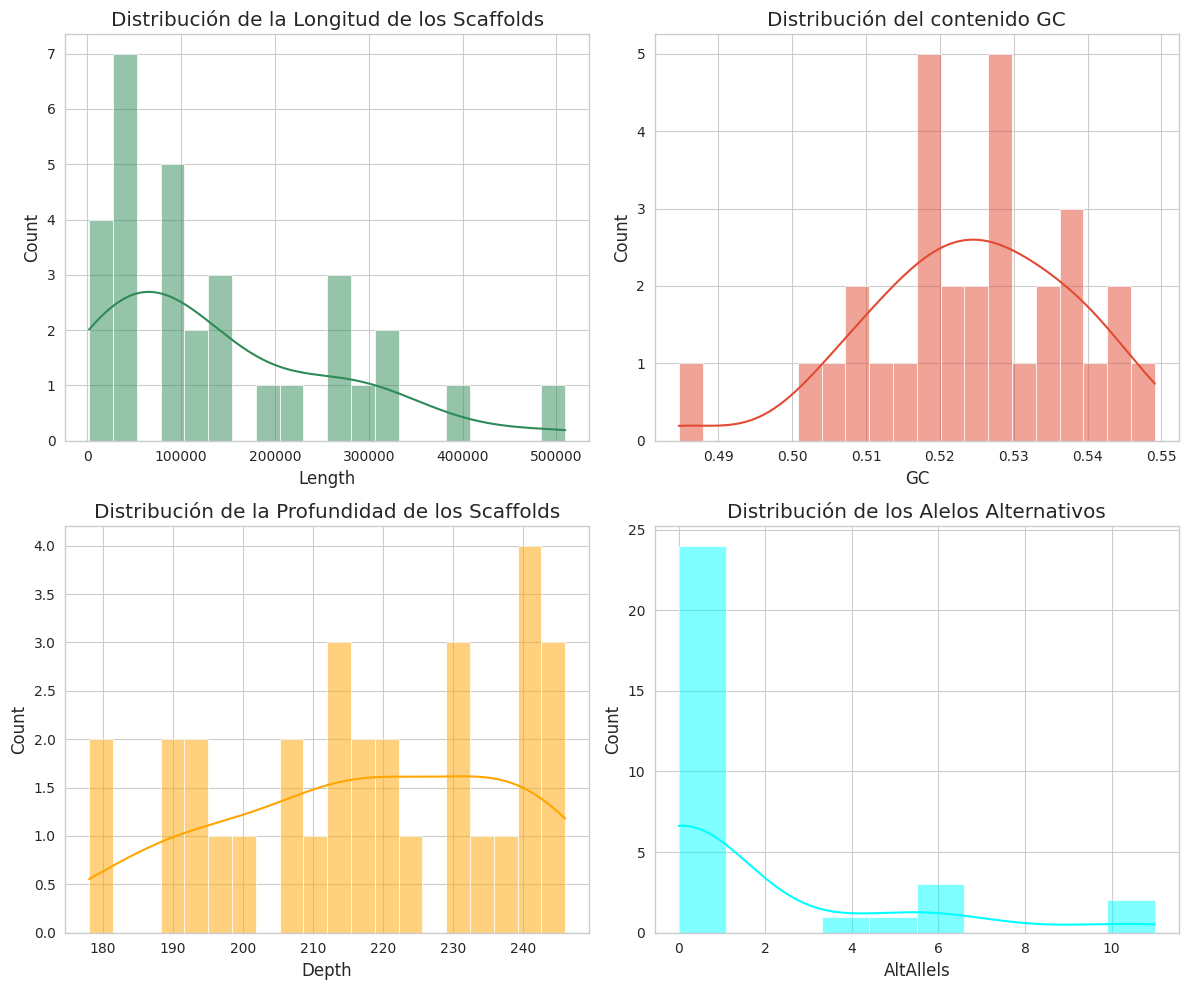

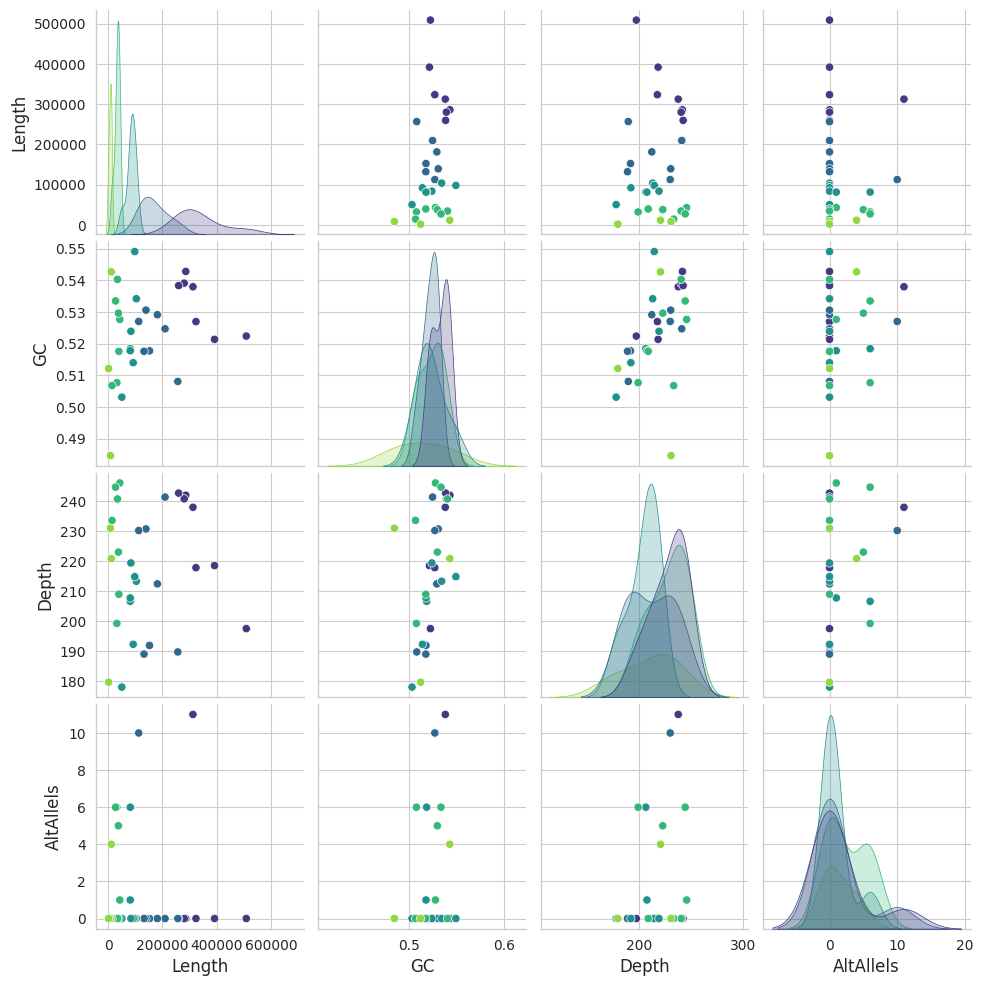

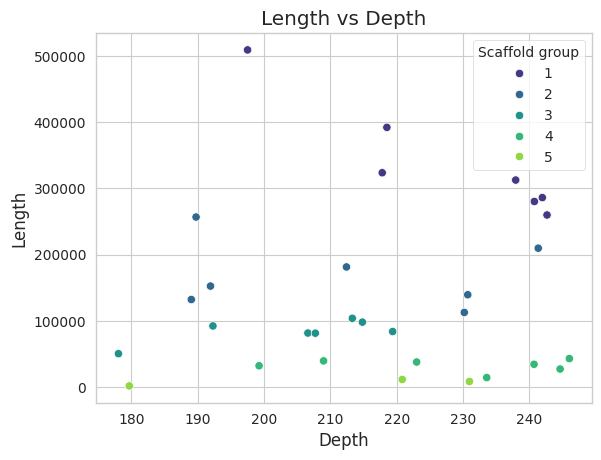

Total de Alelos Alternativos: 50

Procesando archivo LengthDepth_16.csv


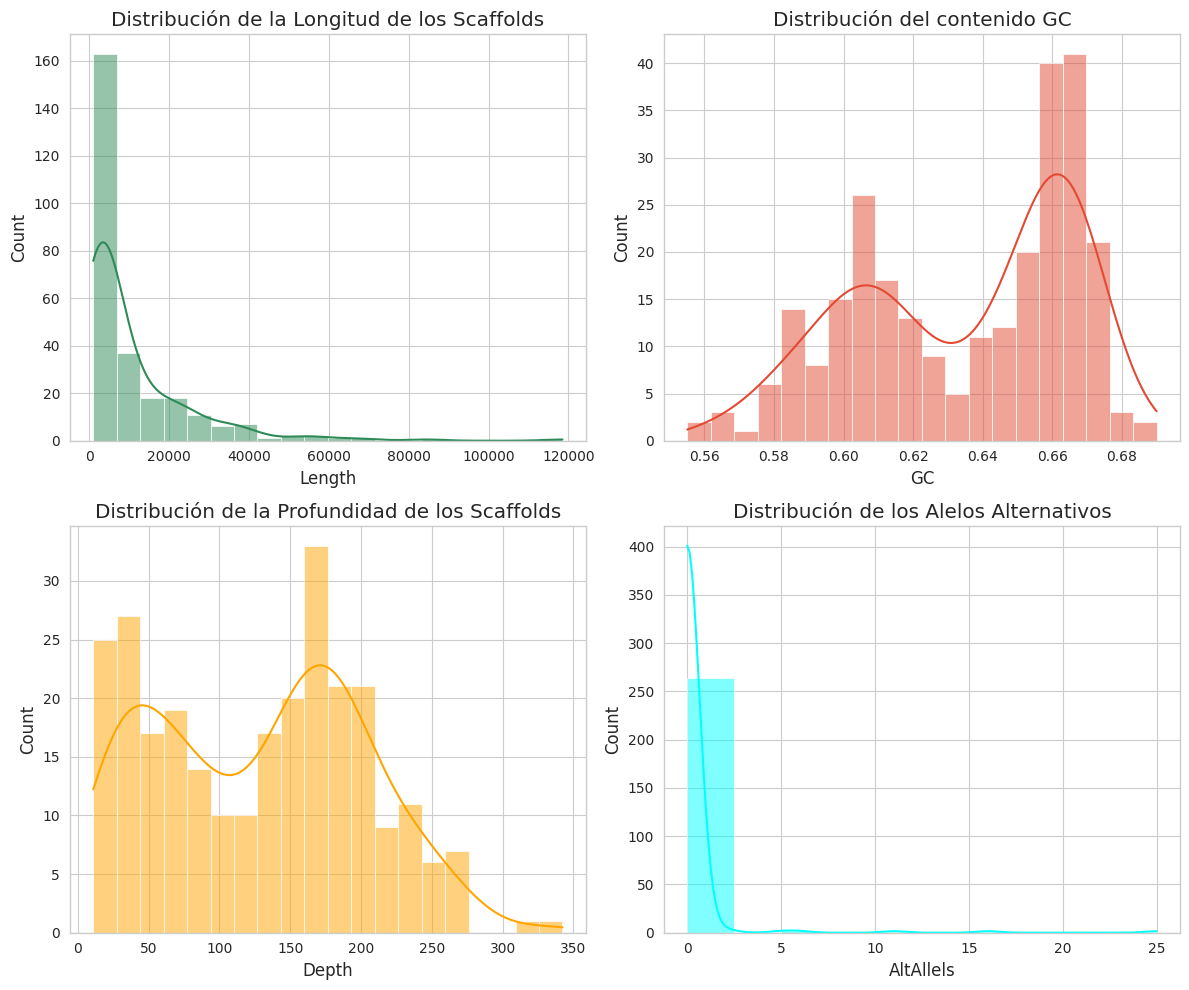

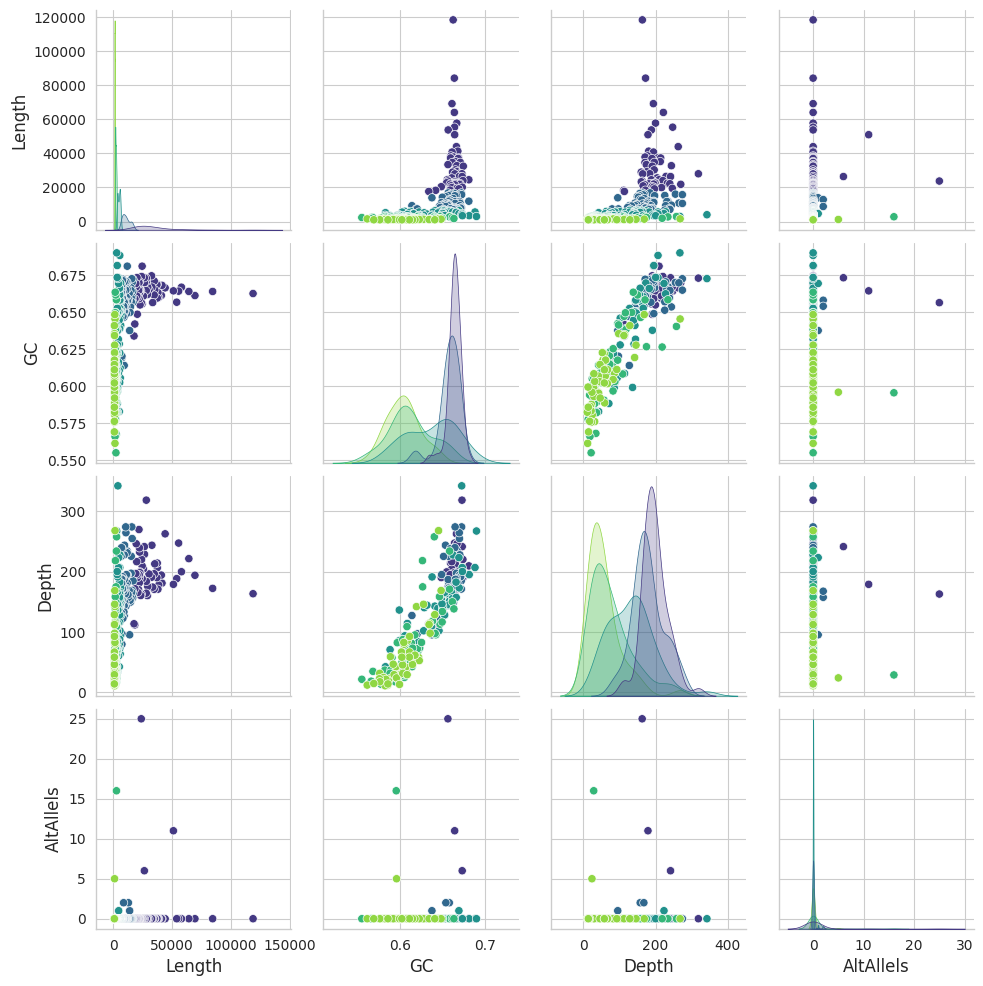

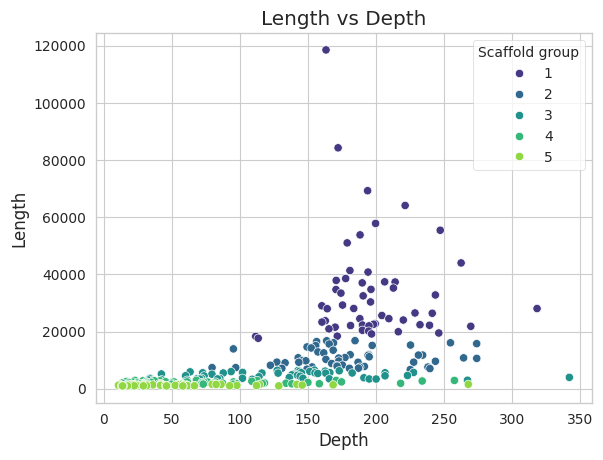

Total de Alelos Alternativos: 69

Procesando archivo LengthDepth_17.csv


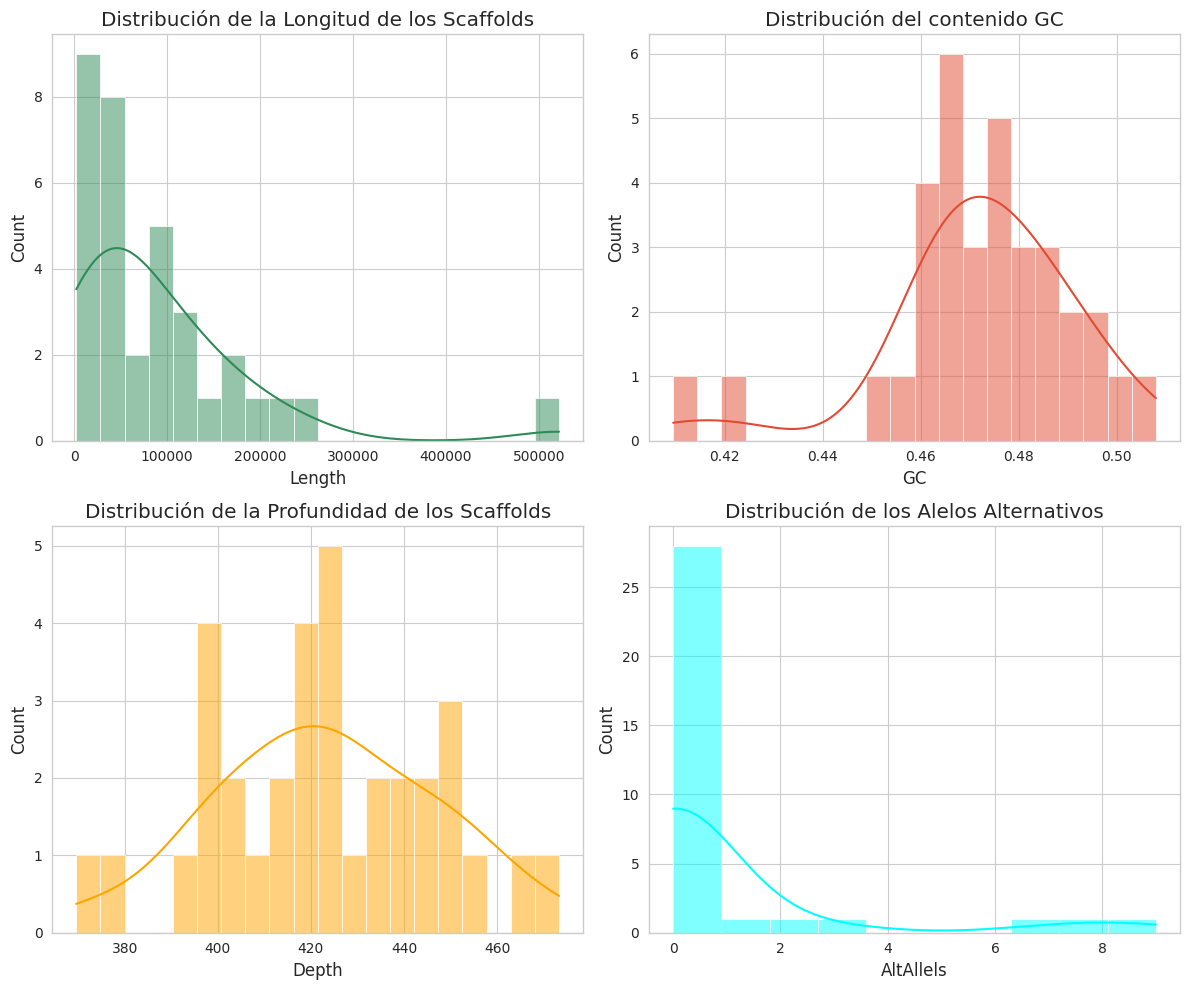

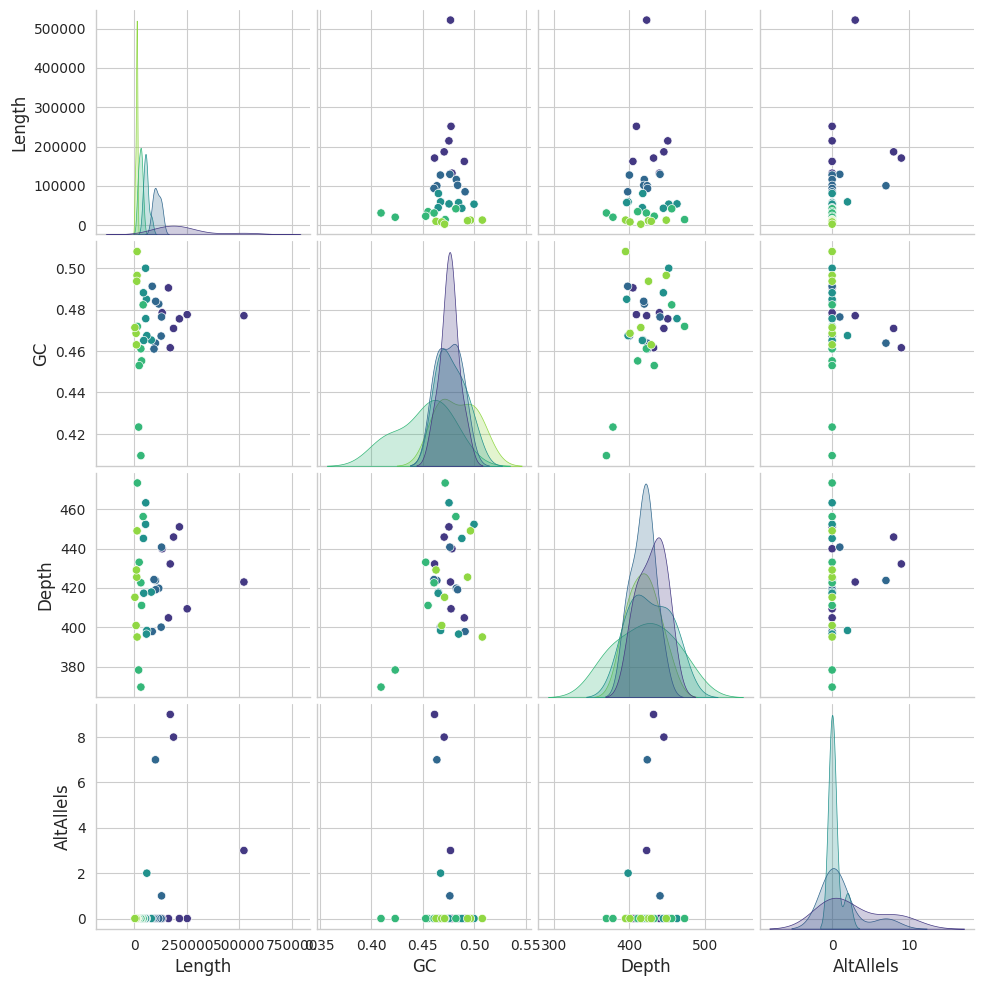

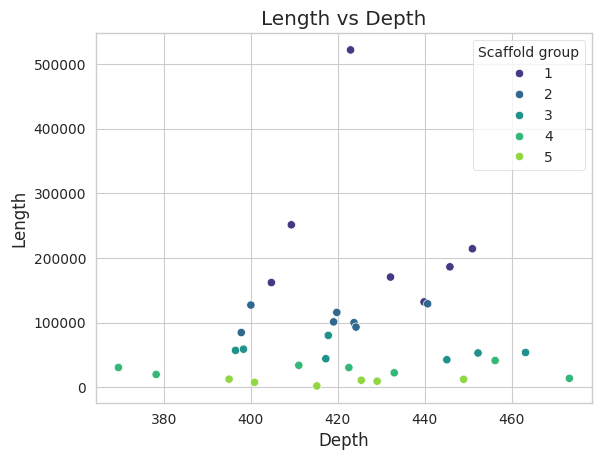

Total de Alelos Alternativos: 30

Procesando archivo LengthDepth_18.csv


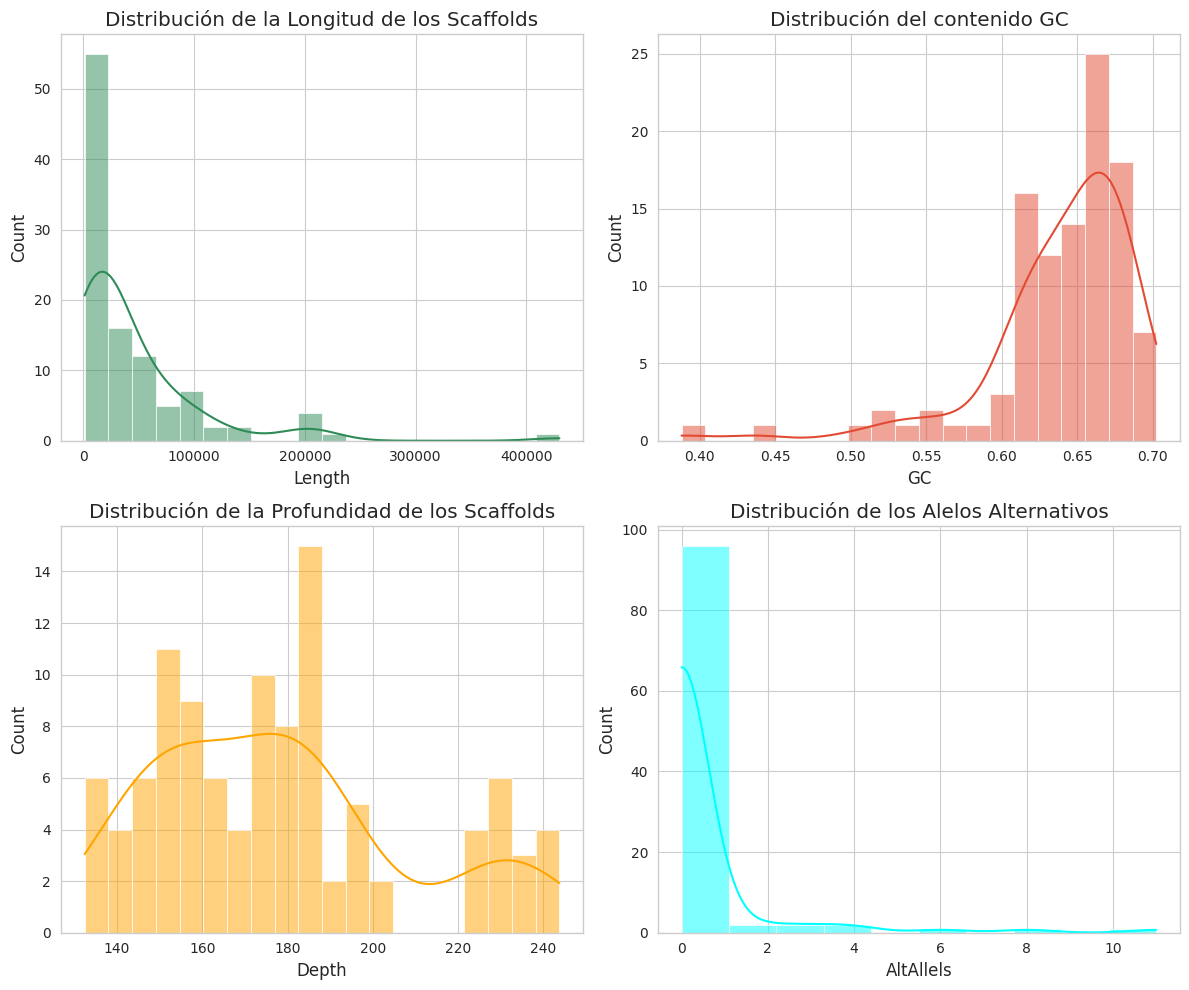

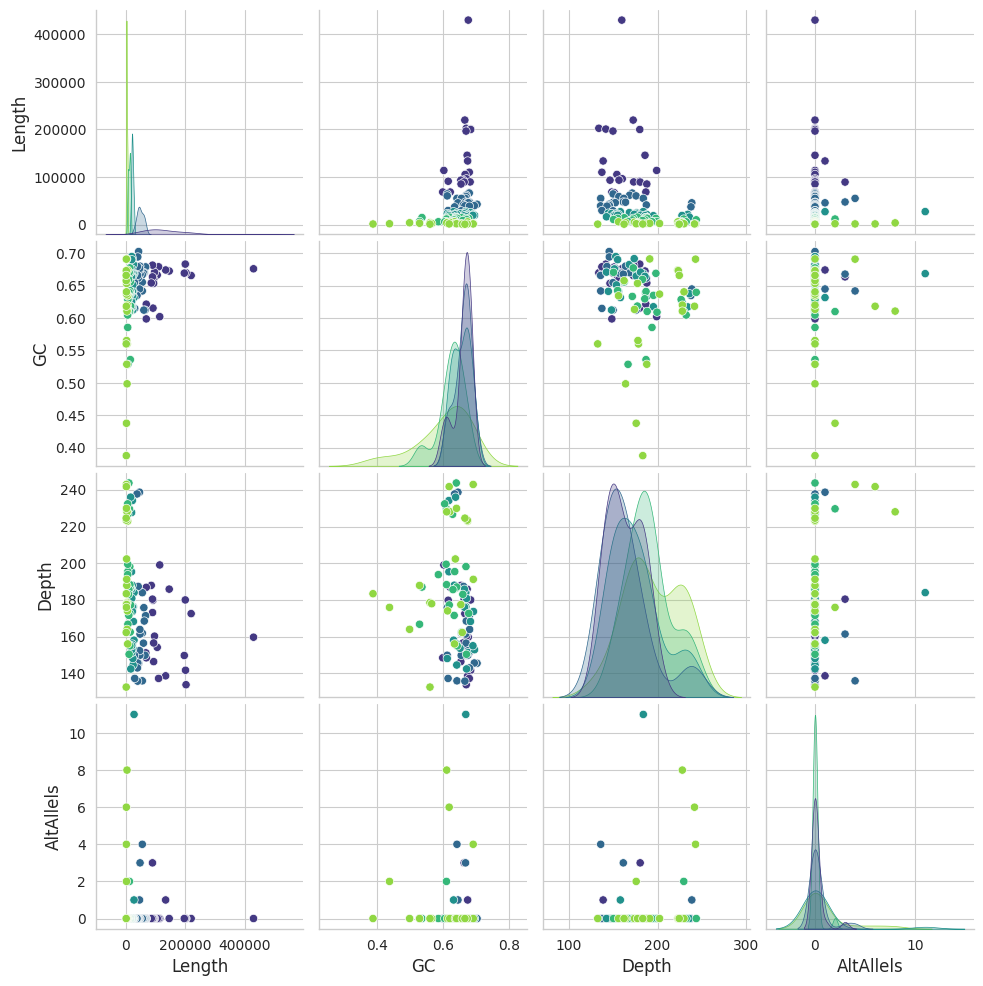

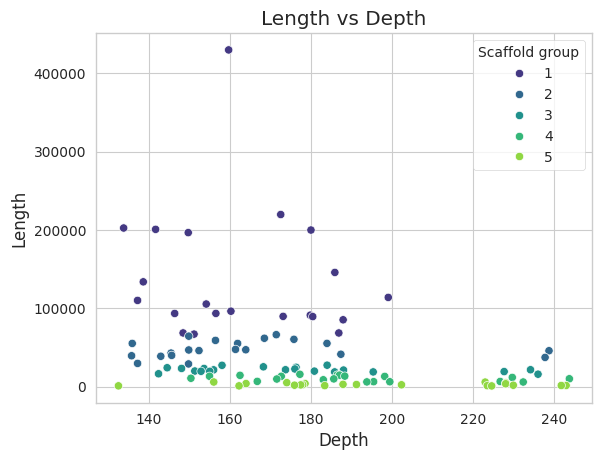

Total de Alelos Alternativos: 46

Procesando archivo LengthDepth_19.csv


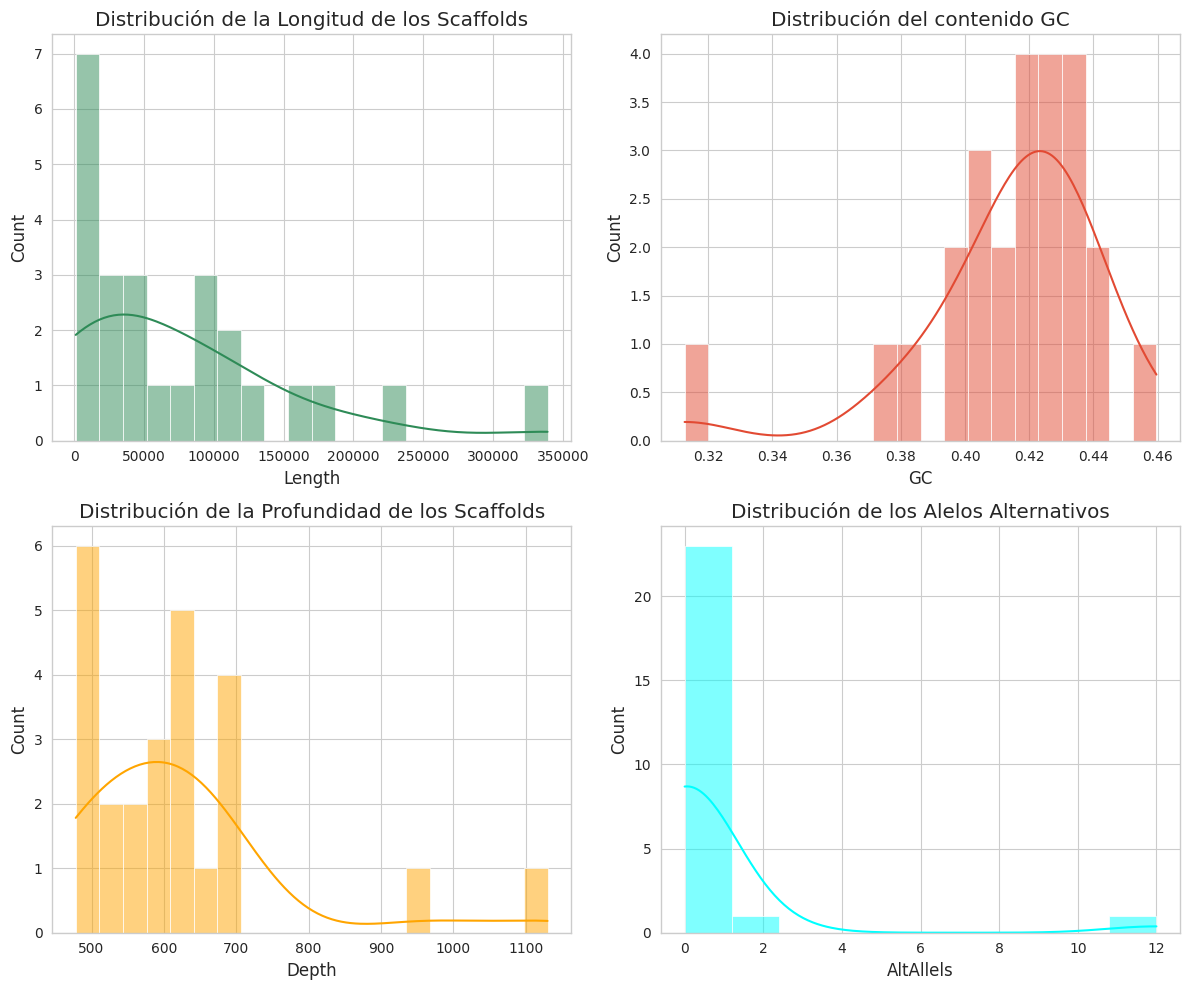

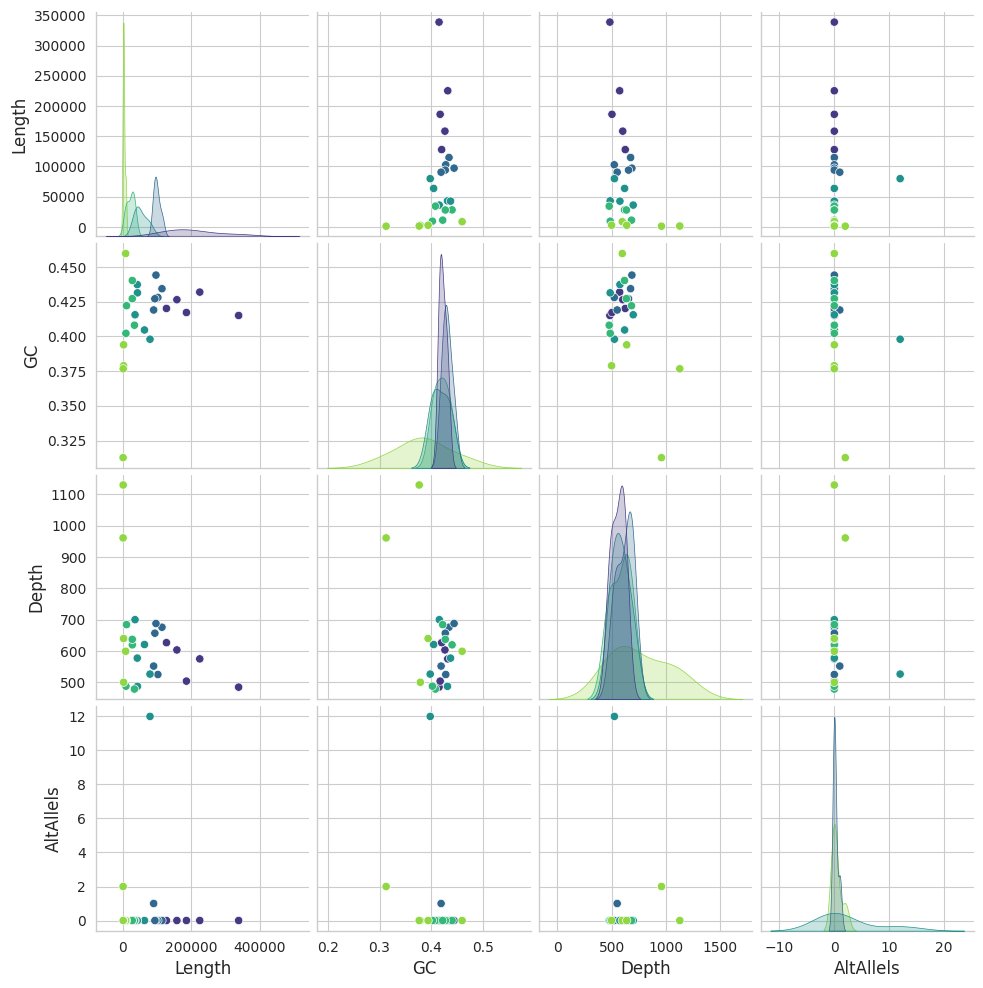

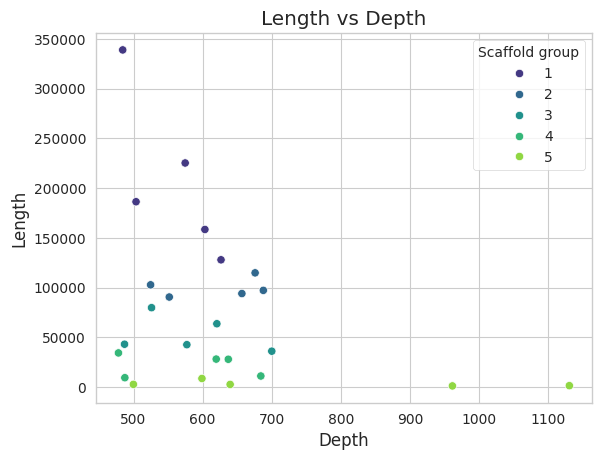

Total de Alelos Alternativos: 15

Procesando archivo LengthDepth_20.csv


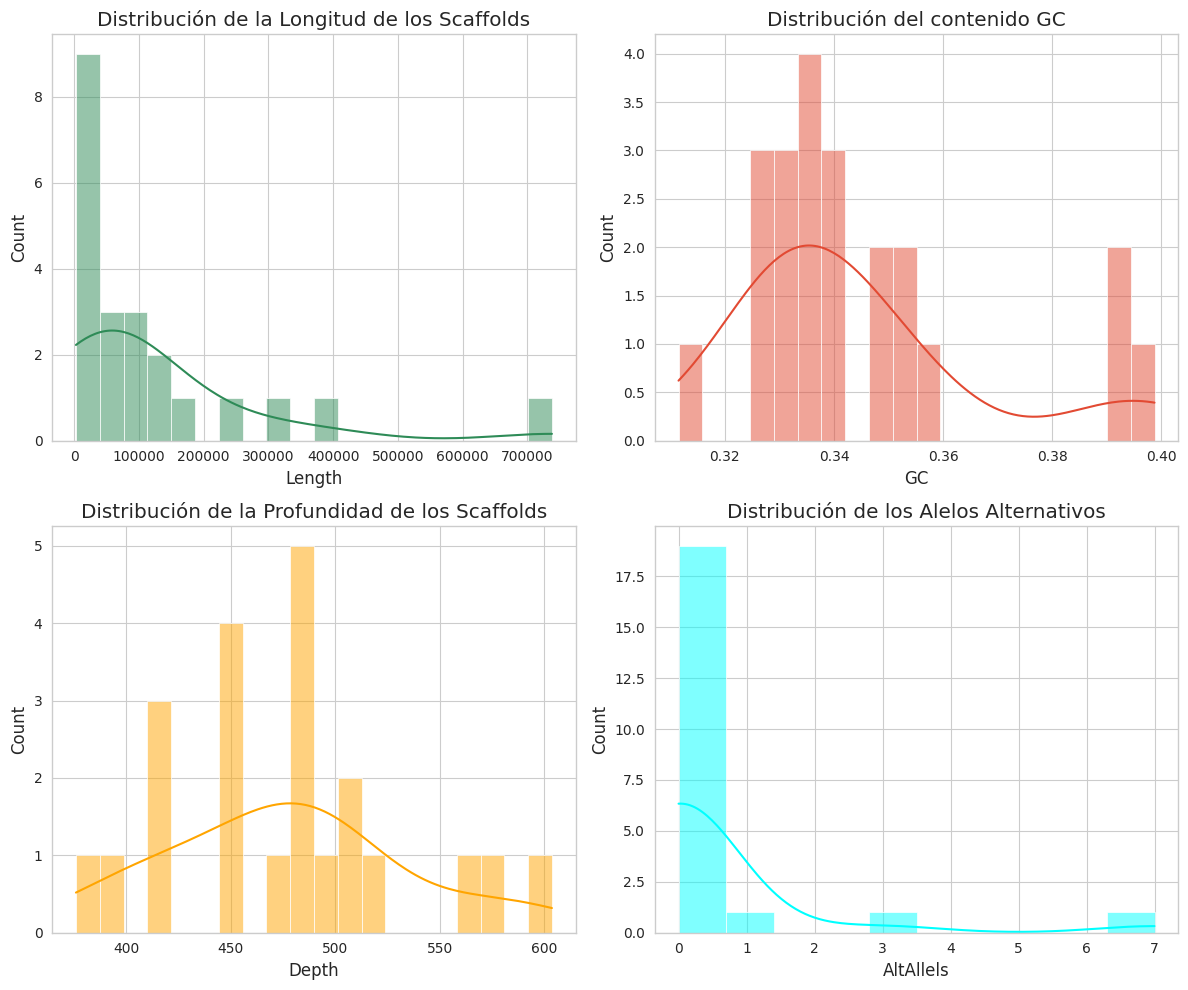

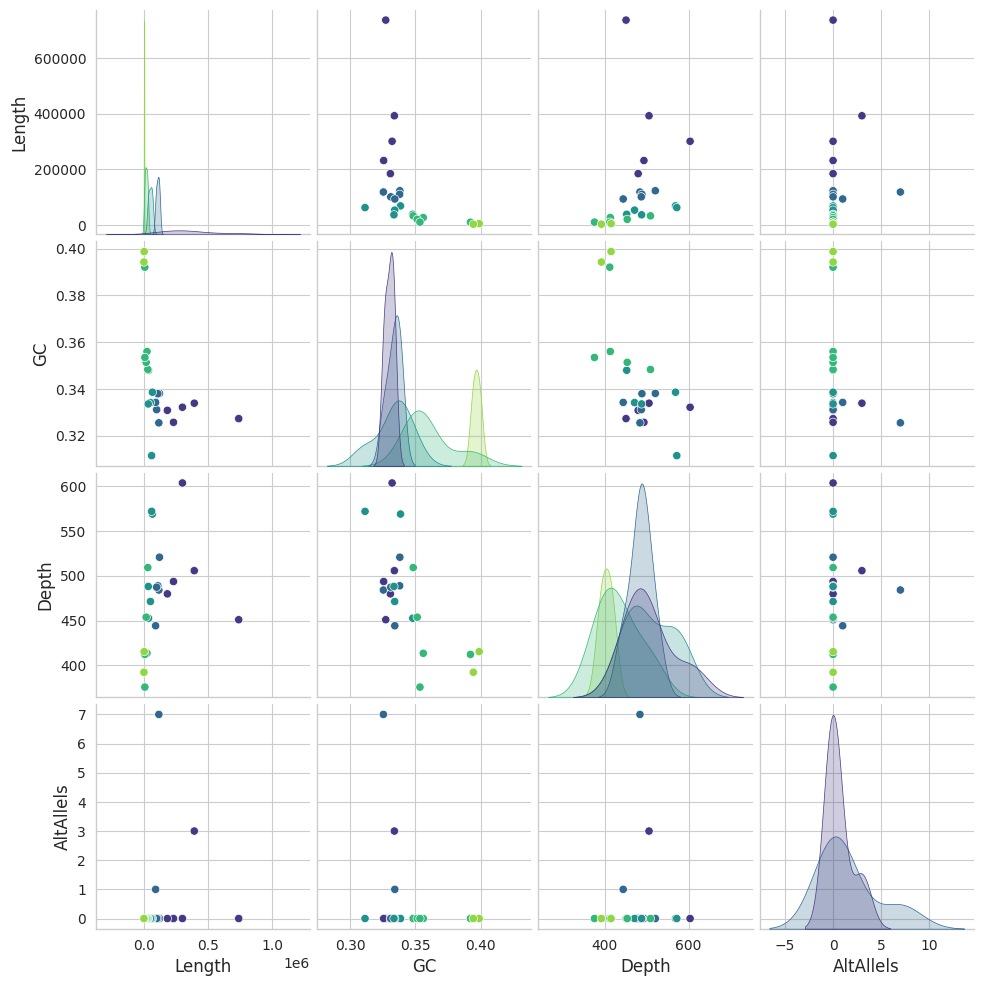

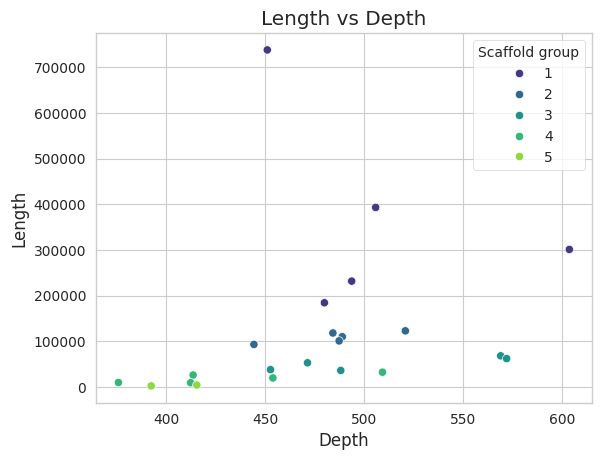

Total de Alelos Alternativos: 11

Procesando archivo LengthDepth_21.csv


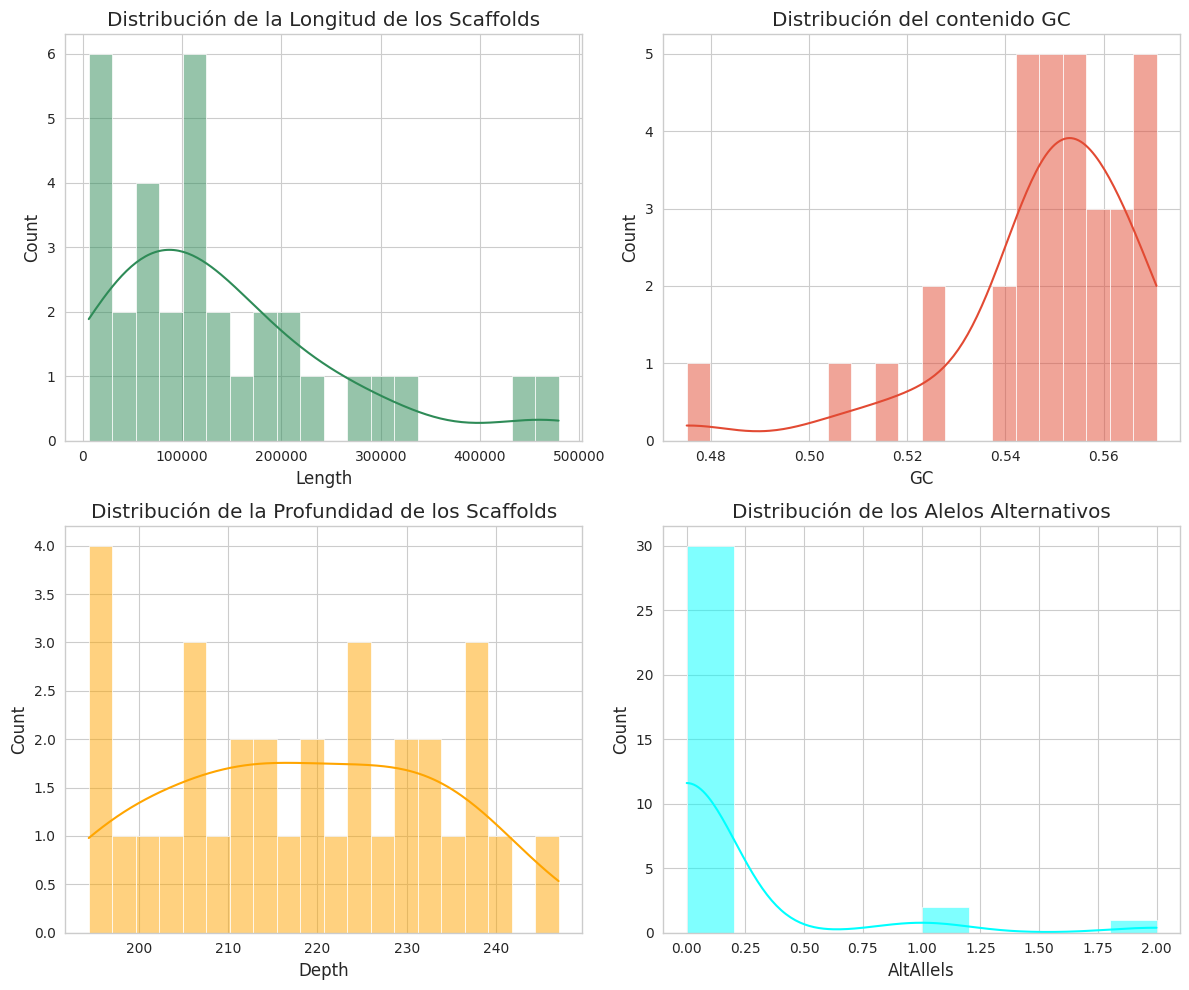

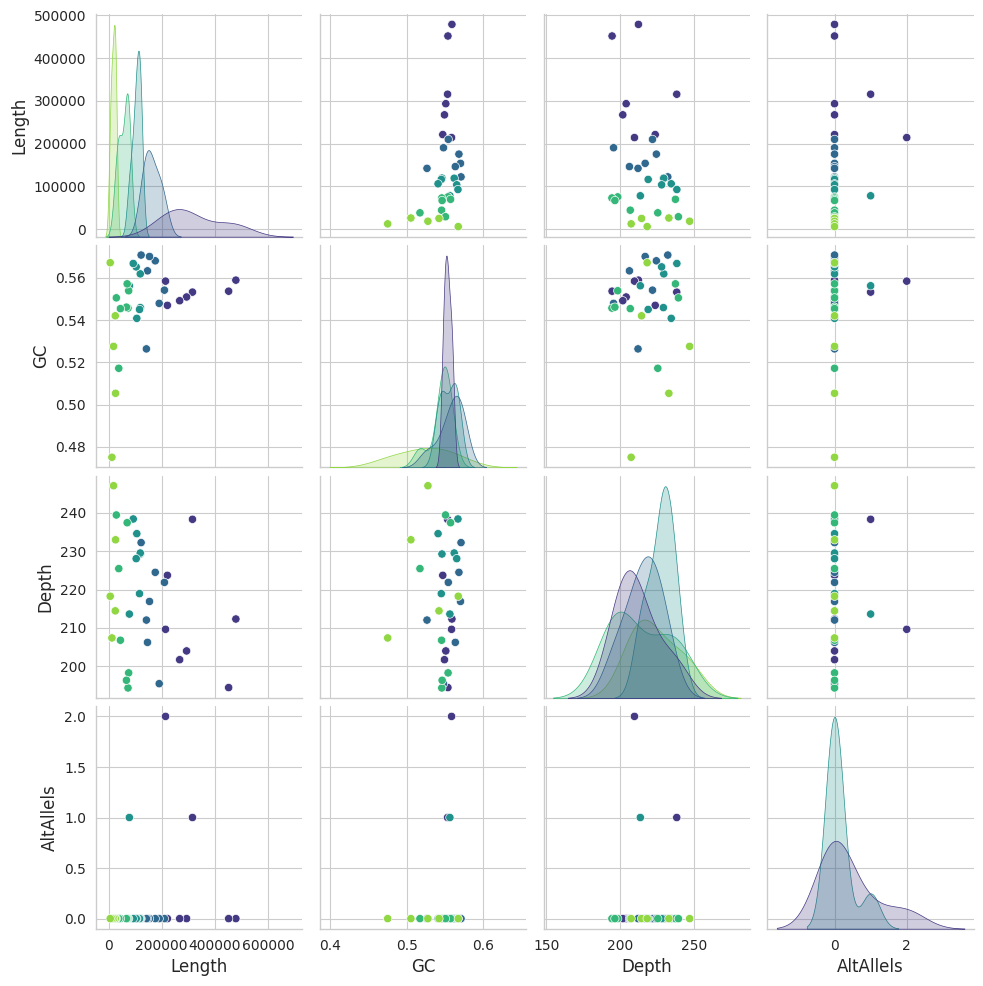

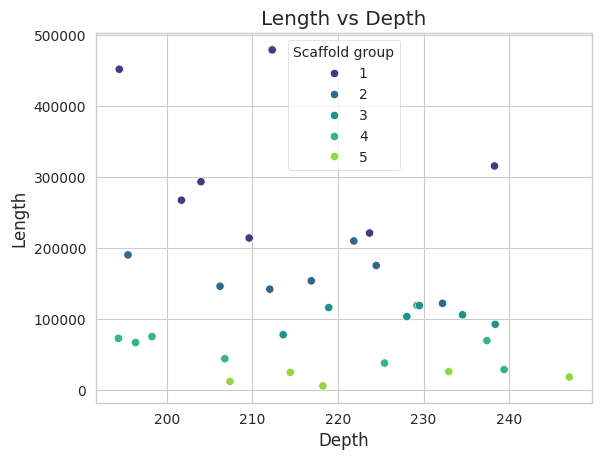

Total de Alelos Alternativos: 4



In [6]:

for i in range(15,22):
  print(f"Procesando archivo LengthDepth_{i}.csv")
  process_genomic_data(f"/content/LengthDepth_{i}.csv")
  print()